In [18]:
from typing import TypedDict
from langgraph.graph import StateGraph, state

In [22]:
class AgentState(TypedDict):
    message: str
    name: str

def greeting_node(state: AgentState) -> AgentState:
    """Simple node that added a greeting message to the state"""
    state['message'] = 'Hello, ' + state['message'] + ", how is your day going?"
    return state

def compliment_node(state: AgentState) -> AgentState:
    """Simple node that added a compliment to the state"""
    state['name'] = state['name'] + ", you're doing an amazing job learning LangGraph!"
    return state


In [23]:
graph = StateGraph(AgentState)

graph.add_node('greeter', greeting_node)
graph.add_node('compliment', compliment_node)

graph.set_entry_point("greeter")
graph.add_edge("greeter", "compliment")
graph.set_finish_point("compliment")

app = graph.compile()

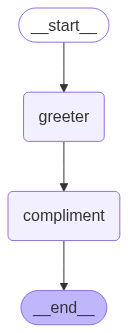

In [24]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [25]:
result = app.invoke({"message": "Poo poo head toilet", "name": "Josh"})

In [31]:
print(result["message"], result["name"])

Hello, Poo poo head toilet, how is your day going? Josh, you're doing an amazing job learning LangGraph!
